This EDA step gives us a first look at the data. You need to have a certain feel for what you have in hand before you can develop strategies for model building. EDA helps you visualize the complexity of the problem and outline the first steps to take.

Data exploration does not just stop at the first pass before characterizing, but also needs to be done throughout the system development process. After building the features, you also need to do EDA again to see if the processed data is "*really clean*". In addition, after building and analyzing the model, we often need to return to EDA to continue discovering what is hidden in the problem data. The deeper you understand the data, the sooner you will be able to explain the model's behavior and make appropriate changes.

## Data Size

First, you need to figure out how many samples and how many data fields there are in the data. If the data is too little, there is a high possibility that you cannot use Deep Learning to solve it and need to use other methods (But ML can with only one data). Knowing about data size also helps you determine the size of training data and validation data as well as prepare appropriate memory.

## Meaning of each data field

Working with tabular data, you need to be mentally prepared to work with data more than with models. Knowing the meaning of each data field helps you have appropriate ways to handle and create features. The meaning of each data field is often included with the data set or sometimes you have to infer it yourself based on the values ​​in the column. For example, if the values ​​in a column are "Thai Binh", "Nghe An", "Ben Tre", ... then there is a high possibility that this column is the province name.

However, there are cases where for information security reasons the values ​​in each field have been encoded as meaningless values. In these cases, knowing the meaning of the information field is extremely important. It directly affects how the features are processed and the quality of the model. If you don't know the meaning and especially the data is encoded in digital form, good luck because there will likely come a time when the model has a quality that you cannot explain.

## Data type of each field

Machine Learning models for tabular data are quite sensitive to the data type. In general, Machine Learning models receive processed data in digital form. One of the requirements of a good model is stability to small changes in inputs. This means that if the model inputs are close to each other, the outputs are also expected to be close to each other. If a category of data is encoded as a number, such as a user ID, which you think is a number, the model will learn that users with similar codes will have similar characteristics. . This is very likely not true, especially when the code is randomly typed.

## Probability distribution of each field

We need to understand the probability distribution of each data field to plan for cleaning the data and creating features related to that data. For each data column, we need to pay attention to the following cases:

- **All values ​​in the column are equal**: For example, in the data there is a column called “Year” and all values ​​are equal to 2020. So this column does not provide predictive meaning. We can delete this column when cleaning the data.

- **There are too many missing values**: If we find the meaning of this column is not important, we can delete it. If it is important, you need to have appropriate strategies (See Handling missing data).

- **Invalid values ​​appear**: If the "Age" data field contains values ​​that are negative numbers or greater than 200, there is a high possibility that they are invalid values. With invalid values, we can reassign it to the nearest valid value or treat it as missing data.

- **Outlier values ​​appear**: Suppose the monthly income information field contains mostly values ​​in the range of 1-100 million $ but there are a few exceptions earning up to 10 billion. If the value of 10 billion is kept the same, the model seems to be forced to train, it has to strain to predict those outlier values, causing the quality of common values ​​to be affected. In addition, if you have to normalize the data to the interval [0, 1] (a very common technique when processing data), most values ​​are in the range [0, 0.01]. These very small and close values ​​can lead to the model not being able to distinguish the difference between different income levels. That's an example with numeric data. With category data with many different categories, if some categories account for 99% of the total sample while the total number of samples of many other categories is only 1%. We need to have special ways of handling this type of data.

## Correlation between data fields

When doing EDA, we also need to calculate the correlation between data fields, especially between the predicted label and the remaining fields. If the correlation coefficient between a column and the label column is zero, there is a high chance that column does not provide much predictive value. You can give priority to columns with greater correlation. On the contrary, if the correlation coefficient between a column and the label column is too high, there are two possibilities:

- That column is likely to yield good prediction results. Then we need to focus on cleaning and building the features related to this column first.
- Data can leak (data leakage). Suppose you need to predict a user's age and recognize a column with a correlation coefficient of 1. If it is the "Year of Birth" column, then obviously you don't need to build a Machine Learning model, just a subtraction. However, the problem may be to predict age when the “Year of birth” field is missing but many other information is known. Obviously we cannot use the "Year of birth" field in this case but need to remove it.

In addition, if two columns are not label columns but are highly correlated, we should also check their meaning to see if one column can be ignored.

Answering these questions will be of great help in data cleaning and feature building later.

Depending on how much time you have and your knowledge of the data, you can analyze the data further. The more you understand the data to build appropriate features, the better quality your model will be.

You will have to return to EDA many more times after you have built your first model. We need to quickly build a complete pipeline for the problem including data processing, model training and model quality assessment. You don't need to focus too much on building a good model from the beginning, but should pay more attention to a complete system to evaluate model quality and find areas for improvement. Based on those assessments, you can make inferences and verify them with data. From there, make appropriate adjustments.

EDA is a relatively boring job if you just like training models. Fortunately, there are many libraries available that support the basic functions mentioned above. Pandas profiling is an example.

Before learning Pandas profiling, let's do a small example with the Titanic data on Kaggle about the meaning of the data fields.

## Titanic Kaggle Challenge

Let's get acquainted with the Titanic data set. This dataset includes three files train.csv, test.csv, and gender_submission.csv.

Let's take a quick look at the data in these three files by displaying the first lines of each file using the head() method in pandas.

In [1]:
import pandas as pd
titanic_path = "https://media.githubusercontent.com/media/tiepvupsu/tabml_data/master/titanic/"
df_train = pd.read_csv(titanic_path + "train.csv")
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df_test = pd.read_csv(titanic_path + "test.csv")
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df_sub = pd.read_csv(titanic_path + "gender_submission.csv")
df_sub.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


We can quickly see that:

- The file *train.csv* and *test.csv* have a set of columns with almost the same name, except that the "Survived" column does not appear in the file *test.csv*. The problem is to use the remaining columns of the *train.csv* file to train a model so that it can predict this "Survived" column based on the columns of the *test.csv* file.
- The file *gender_submission.csv* only has two columns "PassengerID" and "Survived"; This is a sample submission file that players need to complete. The "PassengerID" column includes the passenger codes contained in the test.csv file while the "Survived" column contains the predicted values ​​that the player needs to replace. These sample values ​​correspond to the prediction that only the "female" sex will survive. This can be considered a baseline solution for the problem when using only one feature, "Sex". If a pipeline gives worse results than this baseline solution, you definitely have a bug somewhere that needs to be fixed.
- The "Cabin" column in the two data files has missing values.

## Meaning of each information field

Before finding a solution to the problem, we need to know the meaning of the remaining columns (found at the contest website):

- <code>Pclass</code>: seat class. 1 = Upper rank, 2 = Middle rank, 3 = Lower rank. Thus, the information field "Pclass" can be considered both a category feature and a numeric feature because it has an order. This feature is likely to affect a passenger's ability to survive because a more luxurious class may have better safety measures (or the opposite may be more subjective).
- <code>Sex</code>: passenger's gender.
- <code>Age</code>: passenger's age. If age is less than 1, it is in the form of an odd number (0.42), if age is an estimate, it is in the form of xx.5. Obviously this will also be a potential feature to predict the outcome of the problem because children and the elderly are in a higher risk group.
- <code>Sibsp</code>: number of siblings or spouses on board.
- <code>Parch</code>: number of parents/children on board.
- <code>Ticket</code>: ticket code.
- <code>Fare</code>: ticket price.
- <code>Cabin</code>: cabin code.
- <code>Embarked</code>: Place to board, C = Cherbourg, Q = Queenstown, S = Southampton.

In the above information, we can see that there is information in numeric form such as Age, Fare, Parch, Sibsp, and there is information in category form such as Pclass, Sex, Ticket, Cabin, Embarked. An initial assessment can tell us that there is information that may be useful for model building such as Pclass, Age, Parch, Sibsp and information that may be less useful such as Cabin, Embarked, Ticket, Fare.

## Some statistics

To get a quick look at the statistics of each numeric information field, the describe() method can be used:

In [4]:
import pandas as pd
df_train = pd.read_csv(titanic_path + "train.csv")
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A few observations with this training set:
- "PassengerID", "Pclass" although they are category information, they are still listed here because when not specifically specified, information fields whose entire values ​​can be converted to numbers are considered is digital information.
- In each information field, the statistics shown for non-missing values ​​in that field are:
    - count: number of non-missing elements,
    - mean: average value,
    - std: variance,
    - min: smallest value,
    - max: maximum value,
    - 50%: median – value at which exactly half of the elements in the column have a value less than or equal to it.
    - 25%: median of values ​​from min to 50%, meaning exactly 25% of the elements in the column have values ​​less than or equal to it,
    - 75%: median of values ​​from 50% to max, meaning exactly 75% of the elements in the column have values ​​less than or equal to it,

- With the <code>Survived</code> column, the average value in the column is 0.384. This is the label column that the model needs to predict. This column only contains values ​​0 and 1, so we can say that 38.4% of the values ​​in the column are equal to 1. This proves that the data is relatively balanced between the two classes 0 and 1.

- With the <code>Age</code> column, we see that count = 714 and is smaller than the number of words in the remaining columns (891). This proves that there are 891 - 714 = 177 data samples with missing Age. The youngest person on the ship was only 0.42 years old, while the oldest person was 80 years old.

- With the <code>Sibsp</code> column, the maximum number of siblings or spouses per passenger is 8, but up to 75% of passengers have at most 1 sibling or spouse accompanying them. This proves that the distribution of this data is quite skewed.

- The <code>Parch</code> column is similarly skewed when there is one passenger with up to 6 children/parents while 75% of passengers do not have children/parents accompanying them.

- The <code>Fare</code> column is also quite skewed when the average is 32 while the median is only 14 and the maximum value is up to 512. Passengers with a fare of 0 are likely to be in the crew.

With test set:

In [5]:
df_test = pd.read_csv(titanic_path + "test.csv")
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


A few observations:

- The number of elements in this set is 418 (equal to count in the <code>PassengerID</code> column).

- The <code>Age</code> and Fare columns have many missing values. Thus, although the training set does not have any missing Fare values, the test set has a row with this value missing.

- The statistics in the <code>Age</code>, <code>SibSp</code>, <code>Parch</code> and <code>Fare</code> columns are relatively consistent with the training set.

This is a small dataset with just over 1000 samples in both the training and testing sets. When data becomes larger, we need to have a more comprehensive view of the data through statistical tables of each information field.

Because pandas often needs to load the entire file into RAM, it is not suitable for large data sets. With big data, please read more about dask, modin - with syntax similar to pandas, or pyspark for data processing on distributed systems.

## California Housing

In [6]:
housing_path = "https://media.githubusercontent.com/media/tiepvupsu/tabml_data/master/california_housing/"
df_housing = pd.read_csv(housing_path + "housing.csv")
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The meaning of each column in this data set is relatively clear based on the title of each column. Here, the label column is median_house_value; We need to build a prediction model for this column based on the remaining columns.

## Some statistics

Same as before, we used describe() to check overall status

In [7]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


A few observations with this dataset:
- The <code>total_bedrooms</code> column has fewer values ​​(count) than the remaining columns, 20433 compared to 20640. This proves that there are more than 200 missing values ​​here.
- The columns <code>total_rooms</code>, <code>total_bedrooms</code>, <code>population</code>, and <code>median_income</code> have the largest value far exceeding the third percentile (75%) of those columns.
- The <code>median_house_value</code> column has a fairly large range of values ​​with the highest value being $500001. Most likely the values ​​in this column have been truncated at this value.

With the only category data being the <code>ocean_proximity</code> column, we can use the <code>value_counts</code> attribute.

In [8]:
df_housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

We observe that the majority of values ​​are in the <code><1H OCEAN</code> category, meaning the distance to the sea is less than 1h. Meanwhile, there are only 5 values ​​equal to <code>ISLAND</code>, which means outside the island.

## Representing with Histogram

To have a better look at the distributions of each data field, we should illustrate them. The hist method of pandas.DataFrame allows us to illustrate the histogram of numeric columns. Here the value range of each data column is divided into 50 equal intervals (bins). The height of each bin corresponds to the number of data points falling into that bin.

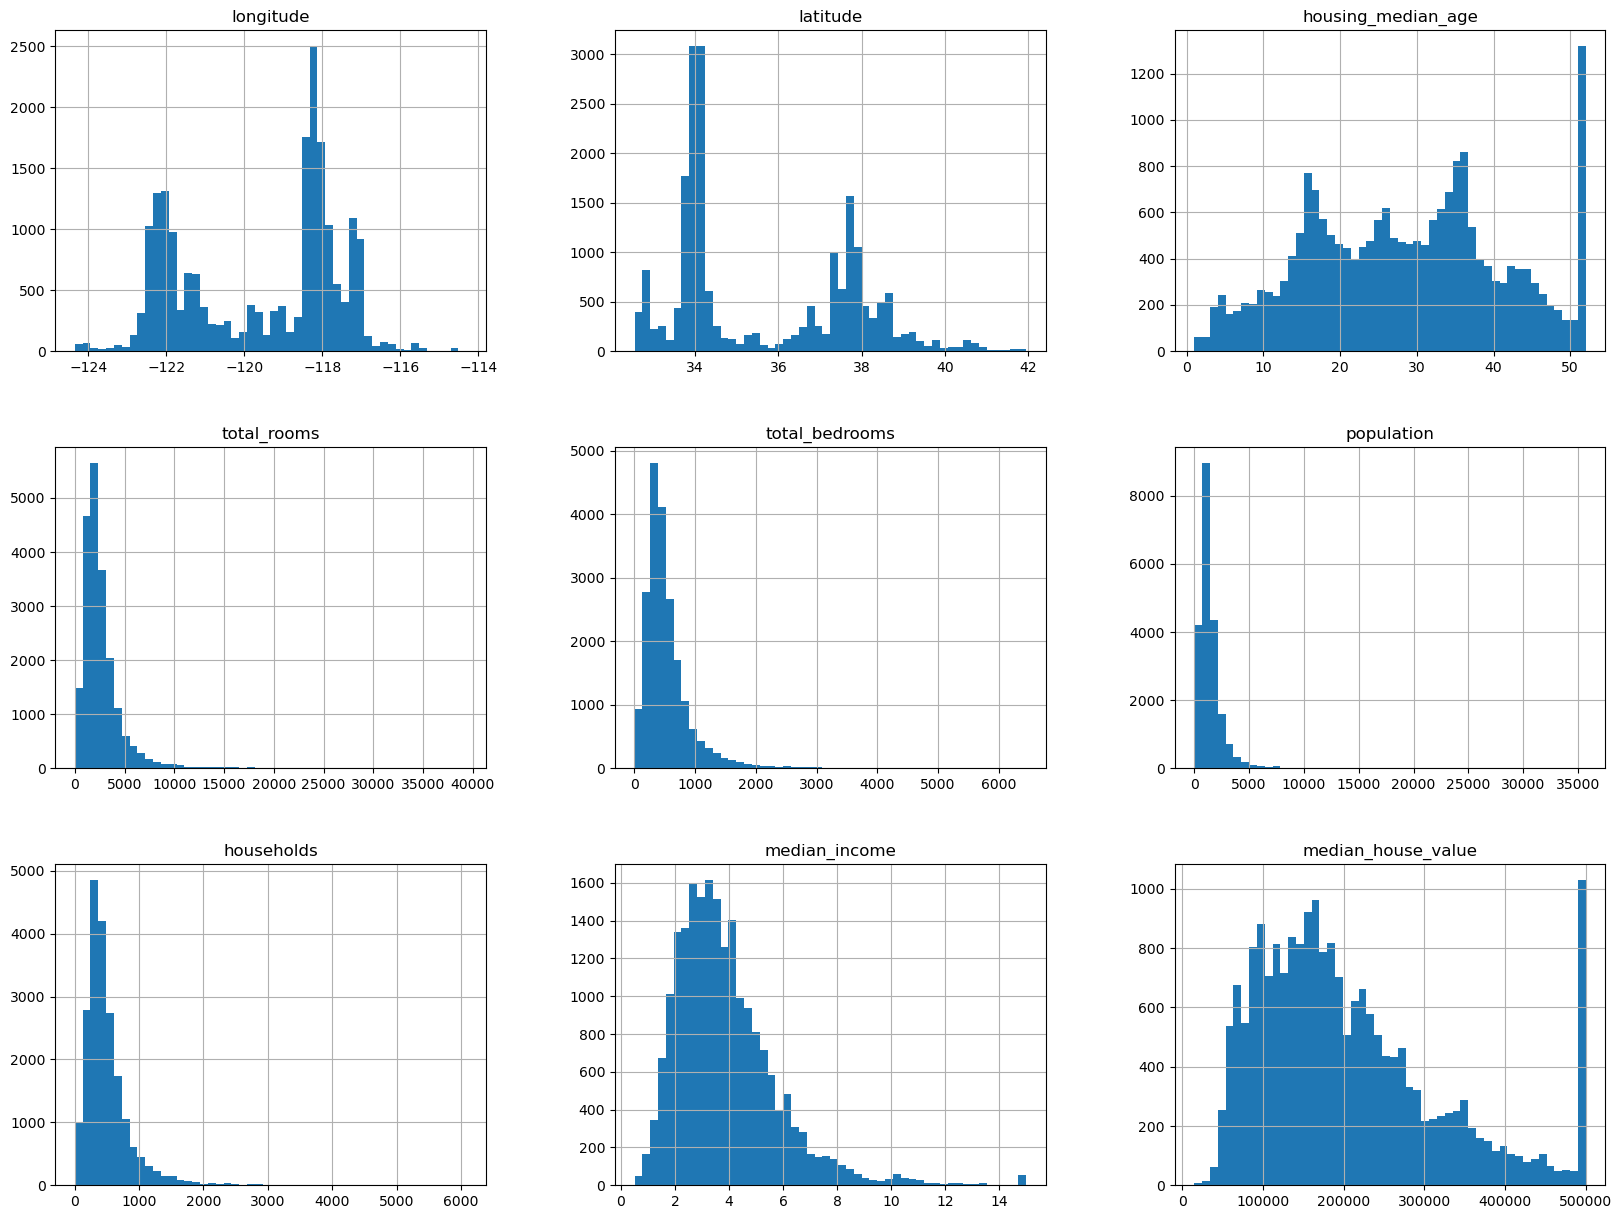

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

df_housing.hist(bins=50, figsize=(20, 15))

A few observations:
- Based on the graphs of <code>longitude</code> and <code>latitude</code>, we see that there are two geographical areas with many data points concentrated. It is likely that these are two large city areas with many satellite towns. A little knowledge of California allows us to predict that this is the area near San Francisco and Los Angeles.
- The <code>housing_median_age</code> and <code>median_house_value</code> columns have the last bin higher than the nearby bins, indicating the possibility of values ​​being clipped at those values. That is, larger values ​​are converted to the value at the cutoff point.
- The columns <code>total_rooms</code>, <code>total_bedrooms</code>, <code>population</code>, <code>households</code> have most of the values ​​concentrated in the first bins, the following bins are very long but have few values. A data distribution where the data is concentrated on one side is called "long tail" or skewed. The distributions in this case are all right-skewed distribution. Here the right shift refers to the “long tail” of the histogram, not the part to which the data primarily belongs. For these data fields, the technique of truncation at a possible value is often used in the same way as the data created in <code>housing_median_age</code> and <code>median_house_value</code>.

## Illustration of correlation

The histograms above show us the distribution of each data field. Another useful way is to illustrate the correlation between data fields to find important fields that are likely to yield high results when building a model.

The pandas library supports drawing scatter_matrix which is very convenient for this. Let's do an example to illustrate the correlation between the columns <code>median_income</code>, <code>population</code>, <code>housing_median_age</code> and the label column <code>median_house_value</code>.

array([[<Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='population', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='median_house_value', ylabel='median_income'>],
       [<Axes: xlabel='median_income', ylabel='population'>,
        <Axes: xlabel='population', ylabel='population'>,
        <Axes: xlabel='housing_median_age', ylabel='population'>,
        <Axes: xlabel='median_house_value', ylabel='population'>],
       [<Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='population', ylabel='housing_median_age'>,
        <Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='median_house_value', ylabel='housing_median_age'>],
       [<Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='population', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_

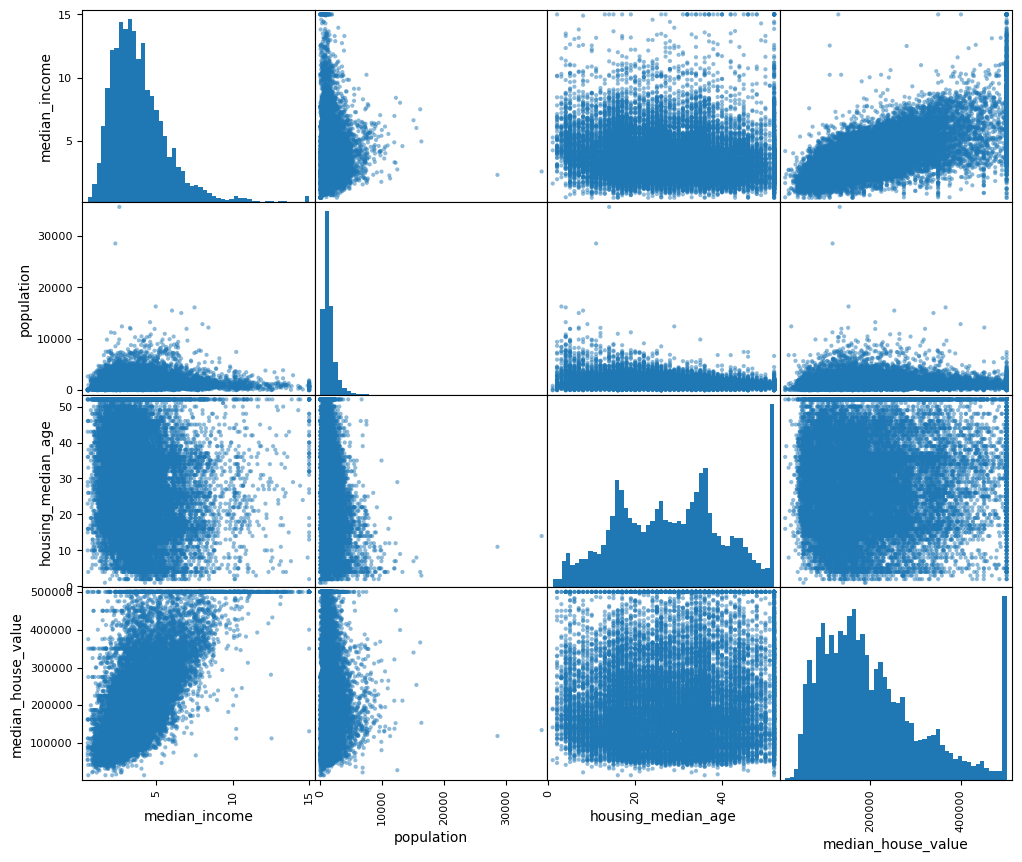

In [10]:
from pandas.plotting import scatter_matrix

columns = ["median_income", "population", "housing_median_age", "median_house_value"]
scatter_matrix(df_housing[columns], figsize=(12,10), hist_kwds={'bins': 50})

The remaining figures show the coordinates of the data points. Specifically, with the cell in the upper right corner corresponding to the column pair <code>(median_house_value, median_income)</code>, we take the two corresponding columns in <code>df_housing</code> as the coordinates and ordinates for these points. Zoom in on this box and you will see:

Text(0, 0.5, 'median_income')

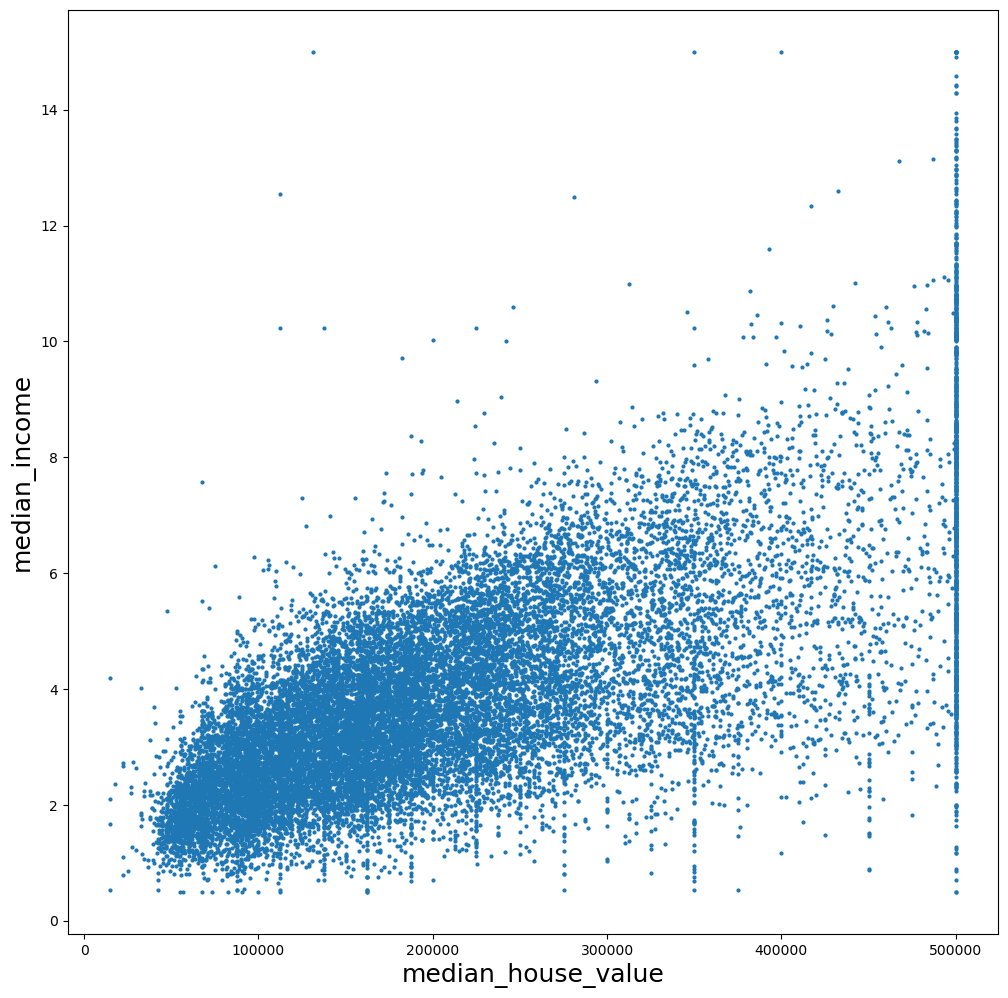

In [11]:
x_label = "median_house_value"
y_label = "median_income"
plt.figure(figsize=(12, 12))
plt.scatter(df_housing[x_label], df_housing[y_label], s=4)
plt.xlabel(x_label, fontsize=18)
plt.ylabel(y_label, fontsize=18)

Here, we observe that areas with high median income (high <code>median_income</code>) tend to have higher prices. The truth is that this is not entirely true as at the right margin, home prices are at their highest but median income ranges from near lowest to near highest. However, most of the data follows the rule that rising income leads to rising house prices. Additionally, we have three other observations:

- The data points are mainly located in the lower left part, the density of points in the remaining cells is quite sparse.

- In addition to the column corresponding to the highest house price, there are quite a few "columns" with many concentration points. For example, in the column the house price is about 350k to 450k is quite a lot of points. This is quite reasonable because prices are often around round numbers (449k, 450k, ...).

- Low-income areas still have more expensive homes (lower right) than low-value homes in high-income areas (upper left).

***REMEMBER***: The more we observe and understand the data, the better off we will be in interpreting model results later.

## Illustration on map

In addition to the general illustrations above, depending on each type of data, we should have additional separate illustrations. In this problem, geographic coordinates can show us more special things than histograms.

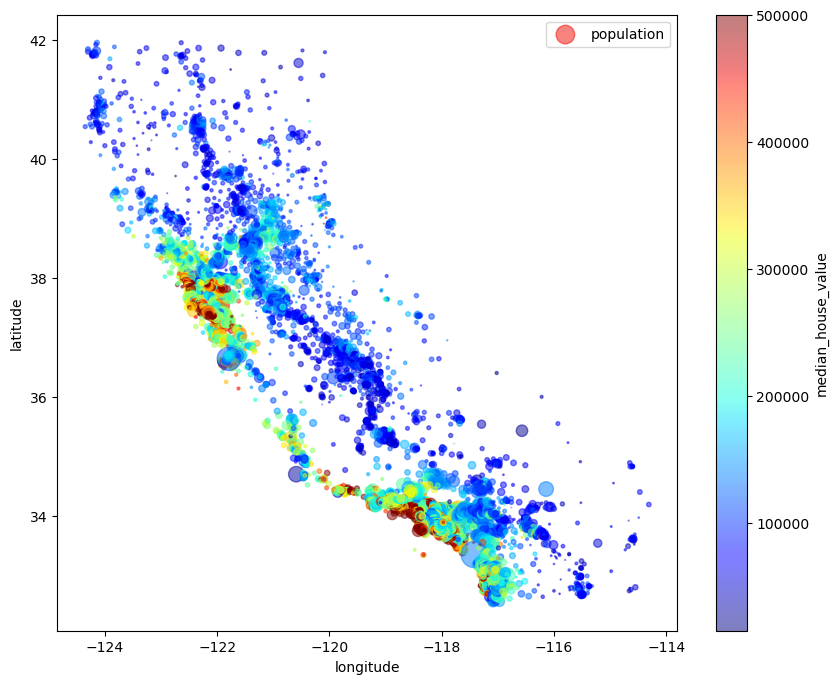

In [12]:
df_housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.5,
    s=df_housing["population"]/100,
    label="population",
    figsize=(10, 8),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True
)
plt.legend()

In the map above, each circle corresponds to a data point with the radius representing the population (population column) and the color representing house prices with blue representing low prices and dark red representing high prices. We see that there are two large residential clusters on the coast with very high house prices.

Compared with the actual level of the state of California:

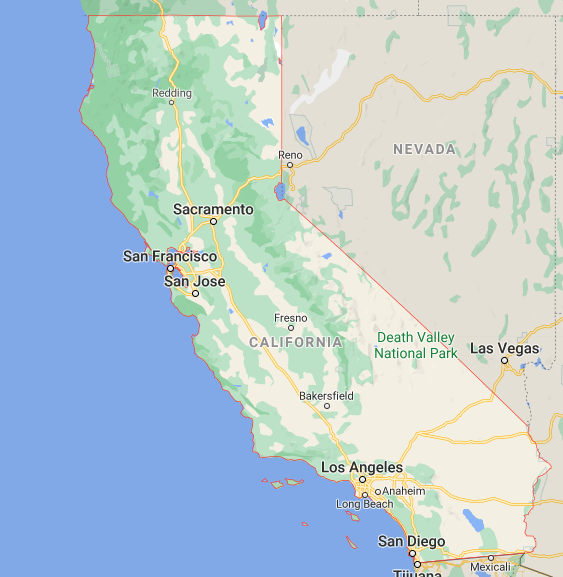

We see that this observation is completely reasonable. The Bay Area to the north and Los Angeles to the south are truly large residential areas with high housing prices. The data was taken from 1990 but is still accurate.

Illustrations, in addition to helping us understand the data more deeply, also help us check to see if there is anything unusual in the data.

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

df_train = pd.read_csv("../data/titanic/train.csv")

profile = ProfileReport(
    df_train, title="Pandas Profiling Report for Titanic train dataset"
)
profile.to_file("../data_to_web/titanic_train_profiling.html")

Currently pandas-profiling only supports EDA for each data table in the form of pandas dataframe. If your dataset has multiple interconnected tables, you will need additional manual processing steps before you can use this tool. Here is the results for this code:

https://machinelearningcoban.com/tabml_book/data_to_web/titanic_train_profiling.html